In [170]:
#Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns


In [169]:
#Loading data frame for movies

df_m = pd.read_csv('movies.csv') 
df_m.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [62]:
#Loading data frame for ratings

df_r =  pd.read_csv('ratings.csv') 
df_r.head()

,userId,movieId,rating,timestamp,time
0,1,296,5.0,1147880044,5/17/06 15:34:04
1,1,306,3.5,1147868817,5/17/06 12:26:57
2,1,307,5.0,1147868828,5/17/06 12:27:08
3,1,665,5.0,1147878820,5/17/06 15:13:40
4,1,899,3.5,1147868510,5/17/06 12:21:50


In [21]:
#print the total number of movies
print('The dataset contains: ', len(df_r), ' ratings of ', len(df_m), ' movies.')

The dataset contains:  1048575  ratings of  22240  movies.


In [22]:
#print movies of a specific genre 'Comedy|Romance'
df_m[df_m['genres'].str.contains('Comedy|Romance')].count()

movieId    9030
title      9030
genres     9030
dtype: int64

In [65]:
# Calculate Average movie ratings for all movies
movie_stats = df_r.groupby('movieId').agg({'rating': [np.mean]})
movie_stats.head()

,rating
,mean
movieId,
1,3.896957
2,3.305830
3,3.169524
4,2.943299
5,3.133462


In [114]:
# merge dataframe movies and ratings for each movie for top 20 movies

movie_ratings = pd.merge(df_m, movie_stats,on= 'movieId')
movie_ratings.columns = ['movieId','title','genres','mean_rating']
movie_ratings.sort_values(['mean_rating'], ascending= False).head(20)



C:\Users\shrik\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:618: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


,movieId,title,genres,mean_rating
20373,175455,Everything Will Be All Right (1995),Comedy|Drama|Romance,5.0
14543,105340,Miracle in Cell No. 7 (2013),Comedy|Drama,5.0
11772,72904,Colossal Youth (Juventude Em Marcha) (2006),Drama,5.0
11771,72899,Blissfully Yours (Sud sanaeha) (2002),Drama|Romance,5.0
14509,104959,Aurora Borealis (2005),Drama|Romance,5.0
21379,189157,Born in the USSR: 7 Up (1991),Documentary,5.0
21380,189159,Born in the USSR: 14 Up (1998),(no genres listed),5.0
21381,189161,Born in the USSR: 21 Up (2005),(no genres listed),5.0
1483,1579,For Ever Mozart (1996),Drama,5.0
14533,105215,Scatter My Ashes at Bergdorf's (2013),Documentary,5.0


In [89]:
# count of movie ratings in terms of users
movie_ratings_userwise = pd.merge(df_r, df_m, on='movieId')
movie_ratings_userwise
ratings_count = pd.DataFrame(movie_ratings_userwise.groupby('title')['rating'].mean())
ratings_count['count_of_rating'] = pd.DataFrame(movie_ratings_userwise.groupby('title')['rating'].count())
ratings_count


,rating,count_of_rating
title,,
"""Great Performances"" Cats (1998)",3.541667,12
#realityhigh (2017),3.000000,1
$ (Dollars) (1971),4.000000,1
$5 a Day (2008),3.666667,3
$9.99 (2008),2.666667,3
...,...,...
Обезьянки и грабители (1985),4.000000,1
Он вам не Димон (2017),3.166667,3
Приключения Домовёнка (1986),3.750000,2


In [173]:
#display top 10 most rated movies by users
ratings_count.sort_values(by='count_of_rating', ascending=False).head(10)


,rating,count_of_rating
title,,
Forrest Gump (1994),4.057987,3518
"Shawshank Redemption, The (1994)",4.436067,3488
Pulp Fiction (1994),4.182417,3418
"Silence of the Lambs, The (1991)",4.131546,3227
"Matrix, The (1999)",4.160738,3064
Star Wars: Episode IV - A New Hope (1977),4.101160,2931
Jurassic Park (1993),3.687432,2745
Schindler's List (1993),4.276031,2545
Fight Club (1999),4.226285,2530


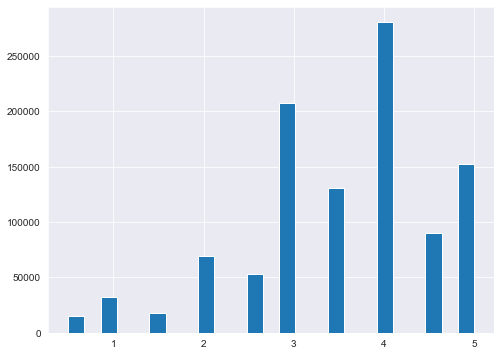

In [181]:
#Relation between no. of movies and ratings received.
sns.set_style('dark')
%matplotlib inline

plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
df_r['rating'].hist(bins=25)


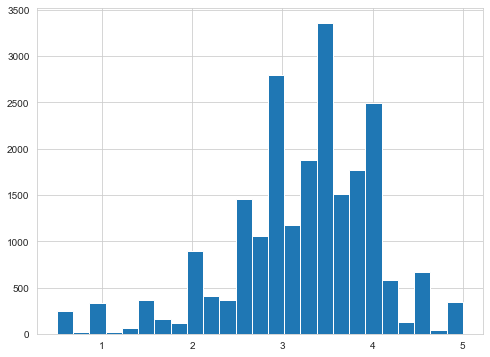

In [183]:
#Relation between no. of movies and ratings received. For example approx. 2800 

sns.set_style('whitegrid')
%matplotlib inline

plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_count['rating'].hist(bins=25)

In [125]:
#loading movie genres
movie_genres=pd.read_csv('movies_genres.csv')
del movie_genres['genres']
del movie_genres['title']
movie_genres

,movieId,No Genres,Action,Adventure,Animation,Children,Comedy,Fantasy,Romance,Sci-Fi,Crime,Thriller,Mystery,Horror,Drama,War,Documentary,Musical
0,1,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0
1,2,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0
4,5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22235,208112,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
22236,208737,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
22237,208793,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
22238,208939,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0


In [148]:
# k-means on genres

kmeans1 = KMeans(n_clusters=17)
kmeans1 = kmeans1.fit(movie_genres)
labels = kmeans1.predict(movie_genres)
C = kmeans1.cluster_centers_
C

array([[ 5.73257203e+04, -4.51028104e-17,  1.55945419e-01,
         1.13060429e-01,  3.41130604e-02,  4.19103314e-02,
         3.10916179e-01,  6.62768031e-02,  1.74463938e-01,
         7.89473684e-02,  1.39376218e-01,  2.08576998e-01,
         6.92007797e-02,  1.09161793e-01,  5.45808967e-01,
         5.94541910e-02,  6.82261209e-02,  3.70370370e-02],
       [ 1.44107562e+05,  7.37847222e-02,  1.78819444e-01,
         7.37847222e-02,  7.29166667e-02,  8.68055556e-02,
         2.98611111e-01,  6.51041667e-02,  1.26736111e-01,
         7.46527778e-02,  8.33333333e-02,  1.90972222e-01,
         5.38194444e-02,  1.32812500e-01,  3.39409722e-01,
         1.30208333e-02,  6.77083333e-02,  5.48172618e-16],
       [ 6.43089366e+03, -7.38992201e-16,  1.38292159e-01,
         9.21052632e-02,  2.17508056e-02,  3.86680988e-02,
         3.63319012e-01,  4.59183673e-02,  1.65682062e-01,
         7.43823845e-02,  1.21106337e-01,  1.58968851e-01,
         5.31686359e-02,  9.93555317e-02,  4.83351235e

In [153]:
#print clusters
cluster_count = kmeans1.fit_predict(movie_genres)
cluster_0=np.where(cluster_count==0)
print(cluster_0)

(array([12935, 12936, 12937, ..., 13998, 13999, 14000], dtype=int64),)


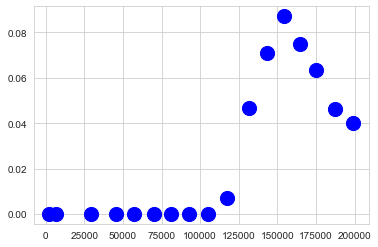

In [154]:
#visual representation of cluster
centers = kmeans1.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=200, alpha=1);


In [165]:
# dimentionality reduction for movie ratings

movie_ratings1 = movie_ratings[['movieId','mean_rating']]
movie_ratings1.head(10)


,movieId,mean_rating
0,1,3.896957
1,2,3.305830
2,3,3.169524
3,4,2.943299
4,5,3.133462
5,6,3.852799
6,7,3.404982
7,8,3.456897
8,9,3.092025
9,10,3.460358


In [166]:
#k-means on movie ratings with a cluster size of 5

kmeans = KMeans(n_clusters=5)
kmeans.fit(movie_ratings1)
y_kmeans = kmeans.predict(movie_ratings1)
C = kmeans.cluster_centers_
C

array([[1.34388770e+05, 3.17552242e+00],
       [4.34889270e+04, 3.34855935e+00],
       [8.90732123e+04, 3.28869183e+00],
       [4.20528871e+03, 3.18784188e+00],
       [1.78437951e+05, 3.17218275e+00]])

In [167]:
#print clusters
cluster_count = kmeans.fit_predict(movie_ratings1)
cluster_0=np.where(cluster_count==0)
print(cluster_0)

cluster_1=np.where(cluster_count==1)
print (cluster_1)

(array([18585, 18586, 18587, ..., 22237, 22238, 22239], dtype=int64),)
(array([   0,    1,    2, ..., 7735, 7736, 7737], dtype=int64),)


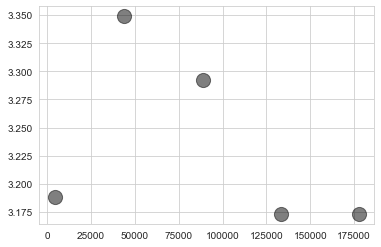

In [168]:
#Visual representation of the cluster
center = kmeans.cluster_centers_
plt.scatter(center[:, 0], center[:, 1], c='black', s=200, alpha=0.5)